In [204]:
import numpy as np
from matplotlib import pyplot as plt
import os
import math
import matplotlib.ticker as ticker

In [316]:
file1 = open("rns_eosAU_e15e14_omega_02_clean.dat","r")
file2 = open("rns_eosAU_e15e14_omega_099_clean.dat","r")
file3 = open("rns_eosAU_e9e14_omega_02_clean.dat","r")
file4 = open("rns_eosAU_e9e14_omega_065_clean.dat","r")
file5 = open("rns_eosAU_e5e14_omega_007_clean.dat","r")
file6 = open("rns_eosAU_e5e14_omega_024_clean.dat","r")
filelist = [file1,file2,file3,file4,file5,file6]

def rns_load(filename):
    #Read header lines
    TotNames = filename.readline()
    TotVals =  filename.readline()
    #print(TotVals)
    ColNames =  filename.readline()
    TotVals.strip()
    #print(TotVals)
    TotVals = TotVals.split()
    #print(TotVals)
    #print(TotVals[0],TotVals[1])
    M_star = float( TotVals[1])#get basic star quantities
    R_star = float(TotVals[3])
    Omega = float(TotVals[4])
    str1 = "M = "+"{:.2f}".format(M_star)+" R = "+"{:.2f}".format(R_star)+r'$\Omega = $'+"{:.2f}".format(Omega)
    data = np.loadtxt(filename)#Load data 
    r = data[:,0]#massage data
    r = np.reshape(r,[-1,65])
    costheta = data[:,1]
    costheta = np.reshape(costheta,[-1,65])
    rho = data[:,2]
    rho = np.abs(np.reshape(rho,[-1,65]))
    rspace = r[:,0]
    #print(costheta.dtype)
    #print(np.arccos(costheta[0,1]))
    thetaspace = np.arccos(costheta[0,:])

    #thetaspace = np.arccos(costheta[0])
    #print(thetaspace)
    #print (rspace.shape, thetaspace.shape, rho.shape)
    maxrho = np.max(rho)
    return (thetaspace, rspace, rho, str1)

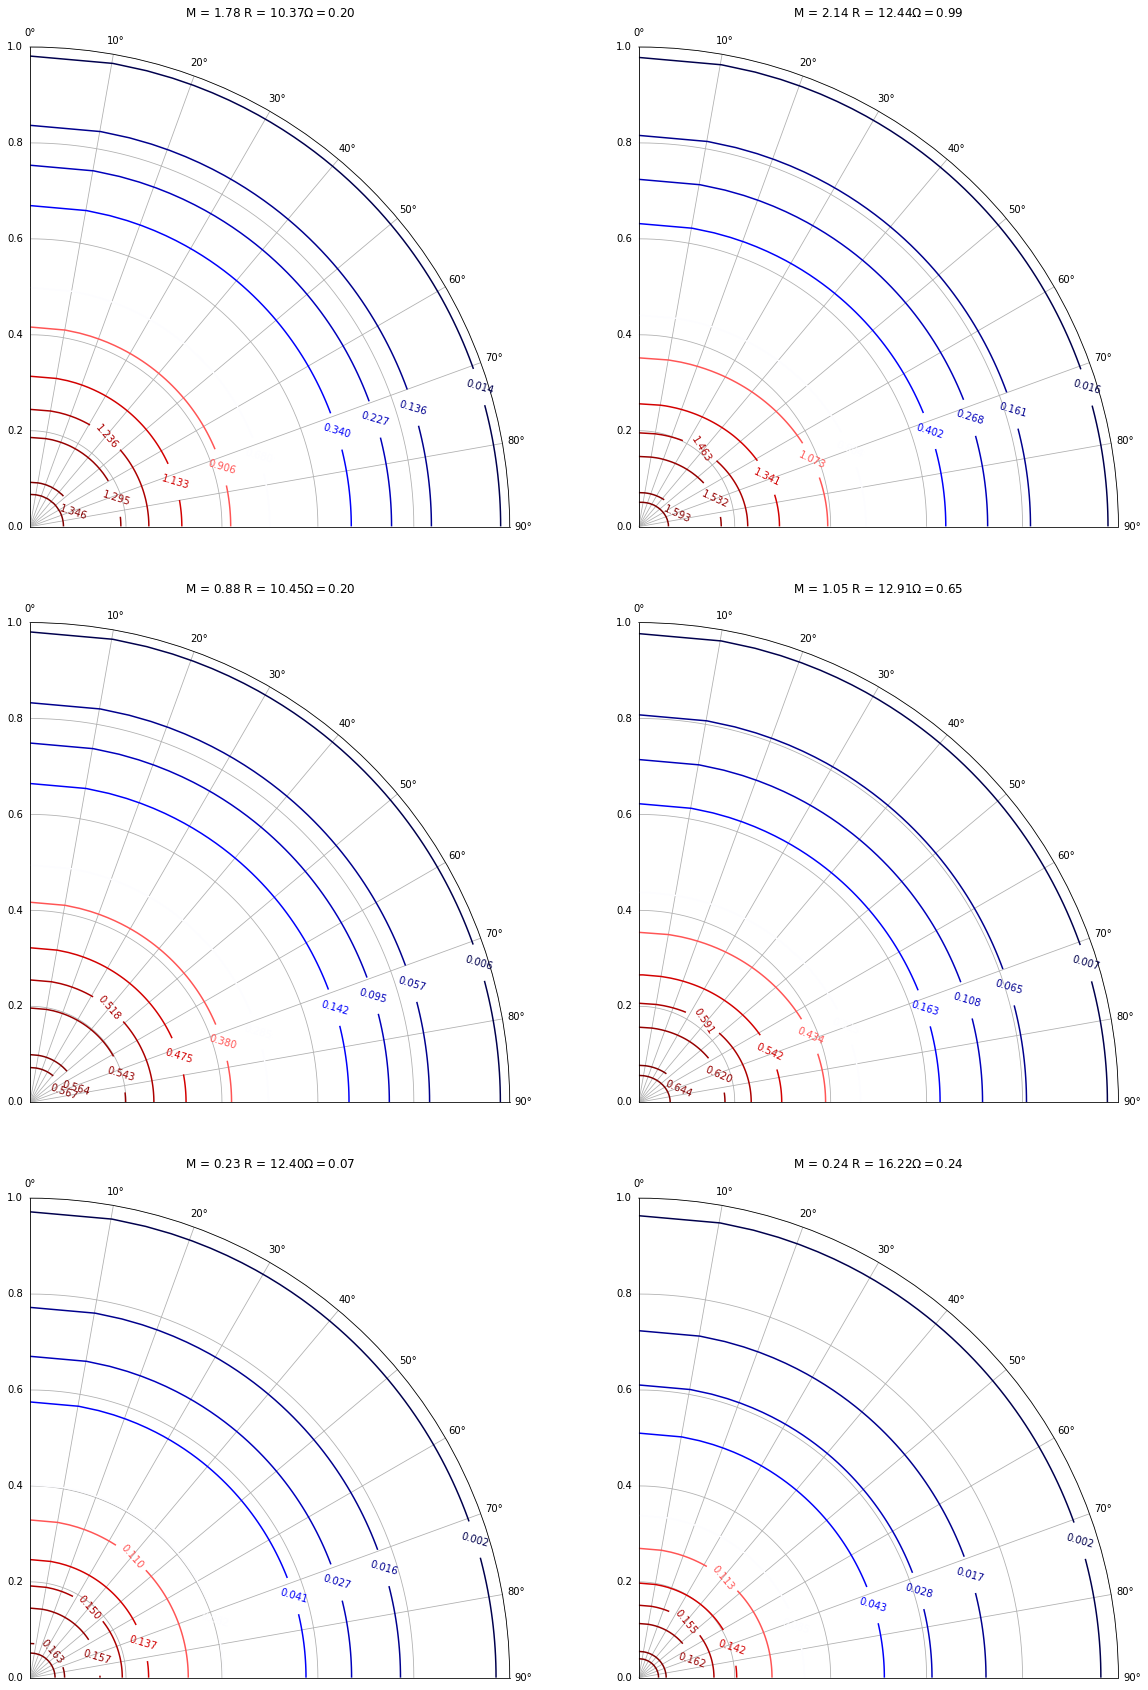

In [317]:
plt.figure(figsize=(20,30))
i=1
for filedic in filelist:
    (theta,r,rho,str1) = rns_load(filedic)
    maxrho = np.max(rho)
    ax = plt.subplot(3,2,i,projection='polar')
    CS2 = ax.contour(thetaspace,rspace,rho,[maxrho/100,maxrho/10,maxrho/6,maxrho/4,maxrho/2,\
                                            maxrho/1.5,maxrho/1.2,maxrho/1.1,maxrho/1.05,maxrho/1.01,maxrho/1.005],cmap='seismic')
    #fmt = ticker.LogFormatterMathtext()
    ax.set_thetalim(0,np.pi/2.0)
    ax.clabel(CS2, CS2.levels)
    ax.set_theta_zero_location("N")  # theta=0 at the top
    ax.set_theta_direction(-1)  # theta increasing clockwise
    ax.set_title(str1)
    i = i + 1
plt.show()
    